In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
!wget https://drive.google.com/uc?id=1IhdoUFdSGdk6Hc0KC-lFHDop0X9M7M4t -O house_data.csv

--2023-04-24 04:52:42--  https://drive.google.com/uc?id=1IhdoUFdSGdk6Hc0KC-lFHDop0X9M7M4t
Resolving drive.google.com (drive.google.com)... 142.250.103.101, 142.250.103.139, 142.250.103.138, ...
Connecting to drive.google.com (drive.google.com)|142.250.103.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0c-84-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/j3fe0uhct79co6uhtqk904vctfvoja1s/1682311950000/02611596255248067438/*/1IhdoUFdSGdk6Hc0KC-lFHDop0X9M7M4t?uuid=a7ca7c88-1234-4166-a939-822c67cf9eaa [following]
--2023-04-24 04:52:44--  https://doc-0c-84-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/j3fe0uhct79co6uhtqk904vctfvoja1s/1682311950000/02611596255248067438/*/1IhdoUFdSGdk6Hc0KC-lFHDop0X9M7M4t?uuid=a7ca7c88-1234-4166-a939-822c67cf9eaa
Resolving doc-0c-84-docs.googleusercontent.com (doc-0c-84-docs.googleusercontent.com)... 172.253.114.132, 2607:f8b0:4001:c22::84
Connecting to d

In [ ]:
df = pd.read_csv('house_data.csv', sep=',')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

## Изучите стоимости недвижимости

In [ ]:
price = df['price']
price.describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

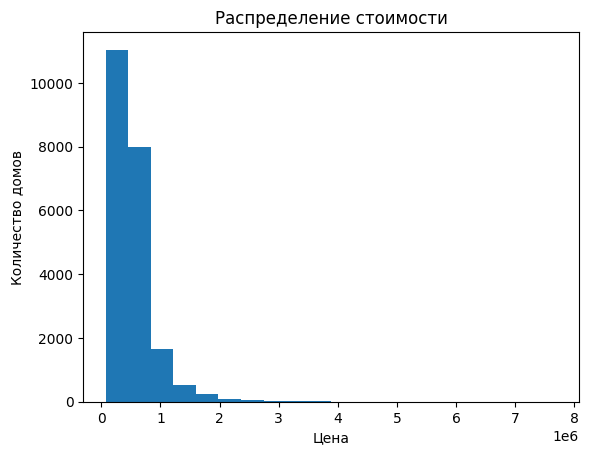

In [ ]:
plt.hist(price, bins=20)

plt.title('Распределение стоимости')
plt.xlabel('Цена')
plt.ylabel('Количество домов')

plt.show()

Судя по графику распределения стоимости домов, большая часть (более 10000 домов) находится в ценовом диапазоне от 300.000 до 600.000 приблизительно, от 600.000 до 800.000 около 8000 домов. Далее количество домов резко снижается при повышении цены более 1.000.000.

## Изучите распределение квадратуры жилой площади

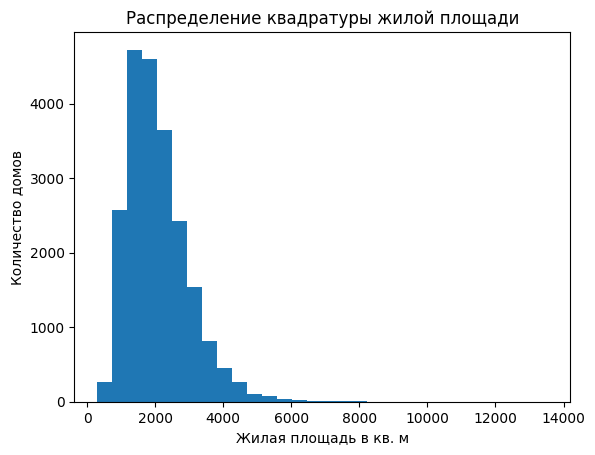

In [ ]:
plt.hist(df['sqft_living'], bins=30)

plt.title('Распределение квадратуры жилой площади')
plt.xlabel('Жилая площадь в кв. м')
plt.ylabel('Количество домов')

plt.show()

График показал, что большая часть домов (около 4500) имеет жилую площадь от 1700 до 2100 кв м. Мы видим постепенное снижение количества домов с увеличением площади.

## Изучите распределение года постройки

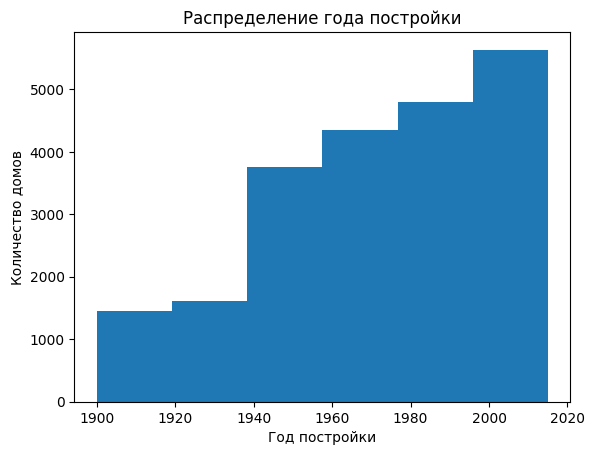

In [ ]:
plt.hist(df['yr_built'], bins=6)

plt.title('Распределение года постройки')
plt.xlabel('Год постройки')
plt.ylabel('Количество домов')

plt.show()

Анализ показал, что представленые дома построены с 1900 года. С 1940 годов резко повысилось число построек более, чем в 2 раза (примерно с 1600 домов до 3800). До 2000 года каждые 20 лет число домов увеличивалось на 400-500. С 2000 до 2020 года было построено свыше 5000 домов (ок. 5500).

## Изучите распределение домов от наличия вида на набережную

In [ ]:
waterfront = df['waterfront'].value_counts()
names = {'Отсутвует': 0, 'Присутвует': 1}

waterfront


0    21450
1      163
Name: waterfront, dtype: int64

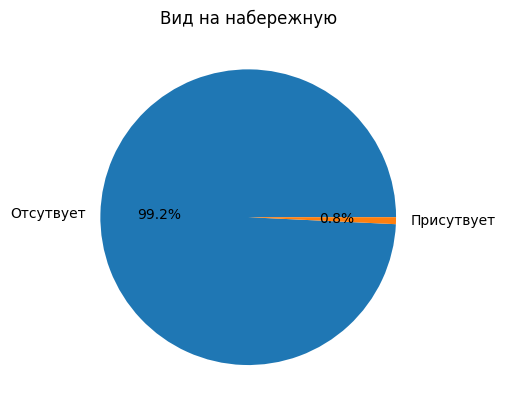

In [ ]:
plt.pie(waterfront, autopct='%.1f%%', labels=names)

plt.title('Вид на набережную')
plt.show()

Круговая диаграмма явно показывает, что у 99.2% домов вид на набережную отсутвует.

## Изучите распределение этажей домов

In [ ]:
floors = df['floors'].value_counts()
floors

1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64

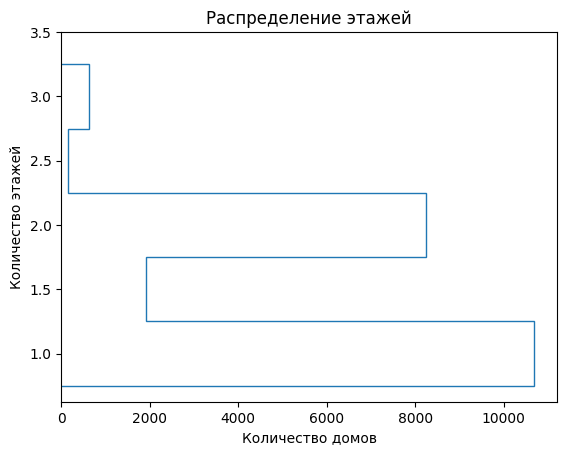

In [ ]:
offset = 0.25
y_ticks = np.arange(1, 4, 0.5)

plt.hist(df['floors'] - offset, bins=5, orientation='horizontal', histtype='step')

plt.title('Распределение этажей')
plt.xlabel('Количество домов')
plt.ylabel('Количество этажей')
plt.yticks(y_ticks)

plt.show()

График показал, что большинство домов имеют 1 или 2 этажа: 10.000 домов имеют 1 этаж, 2 этажа - более 8000.

## Изучите распределение состояния домов

In [ ]:
df['condition'].value_counts()

3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64

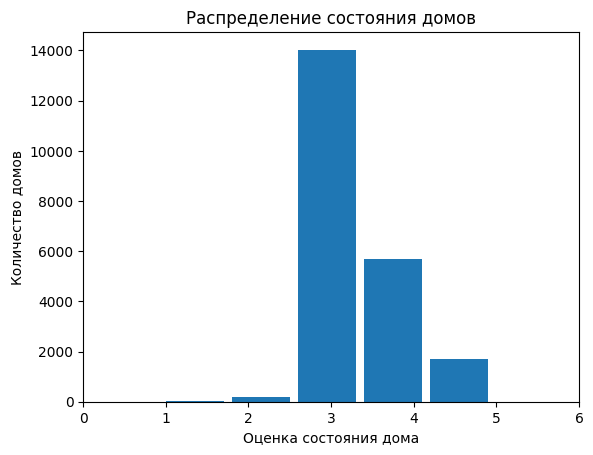

In [ ]:
plt.hist(df['condition'], bins=5, width=0.7, align='mid')

n_ticks = np.arange(0, 7)

plt.title('Распределение состояния домов')
plt.xlabel('Оценка состояния дома')
plt.ylabel('Количество домов')
plt.xticks(n_ticks)

plt.show()


Большая часть домов имеют удовлетворительное состояние (3). 



## Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости



In [ ]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
import seaborn as sns

In [ ]:
corr = df.corr()
corr[np.abs(corr) < 0.3] = 0
corr = np.round(corr, 1)

corr

<ipython-input-7-394ed68312b2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
price,0.0,1.0,0.3,0.5,0.7,0.0,0.0,0.0,0.4,0.0,0.7,0.6,0.3,0.0,0.0,0.0,0.3,0.0,0.6,0.0
bedrooms,0.0,0.3,1.0,0.5,0.6,0.0,0.0,0.0,0.0,0.0,0.4,0.5,0.3,0.0,0.0,0.0,0.0,0.0,0.4,0.0
bathrooms,0.0,0.5,0.5,1.0,0.8,0.0,0.5,0.0,0.0,0.0,0.7,0.7,0.0,0.5,0.0,0.0,0.0,0.0,0.6,0.0
sqft_living,0.0,0.7,0.6,0.8,1.0,0.0,0.4,0.0,0.0,0.0,0.8,0.9,0.4,0.3,0.0,0.0,0.0,0.0,0.8,0.0
sqft_lot,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7
floors,0.0,0.0,0.0,0.5,0.4,0.0,1.0,0.0,0.0,0.0,0.5,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0
waterfront,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
view,0.0,0.4,0.0,0.0,0.0,0.0,0.0,0.4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
condition,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.4,0.0,0.0,0.0,0.0,0.0,0.0


<Axes: >

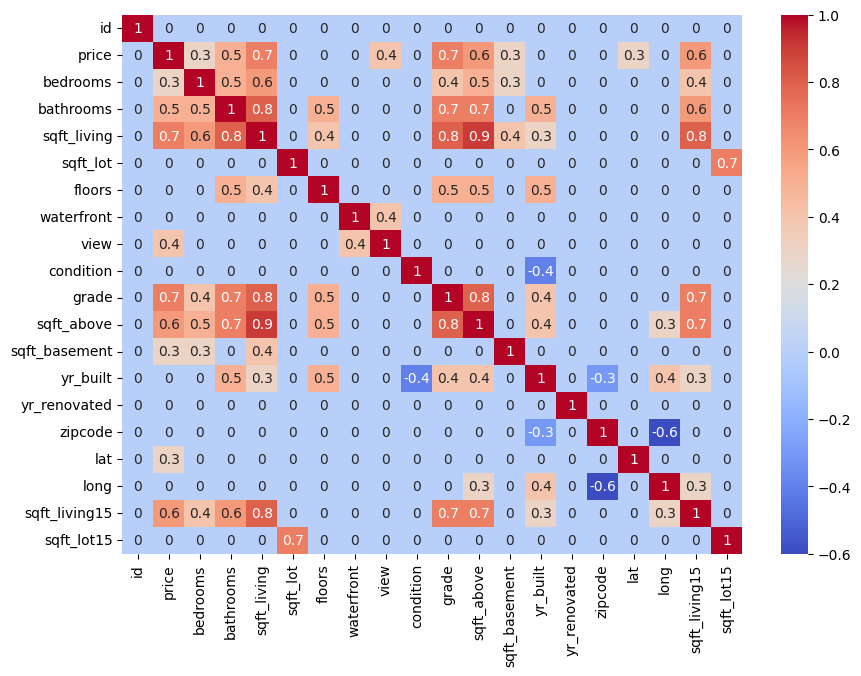

In [ ]:
plt.figure(figsize=(10, 7))

sns.heatmap(corr, annot=True, cmap='coolwarm')

На heatmap можно наблюдать довольно сильную зависимость цены дома (price) от количества ванных комнат (bathrooms), жилой площади (sqft_living), оценки (grade) и жилой площади 15-ти семей, проживающих рядом (sqft_living15).

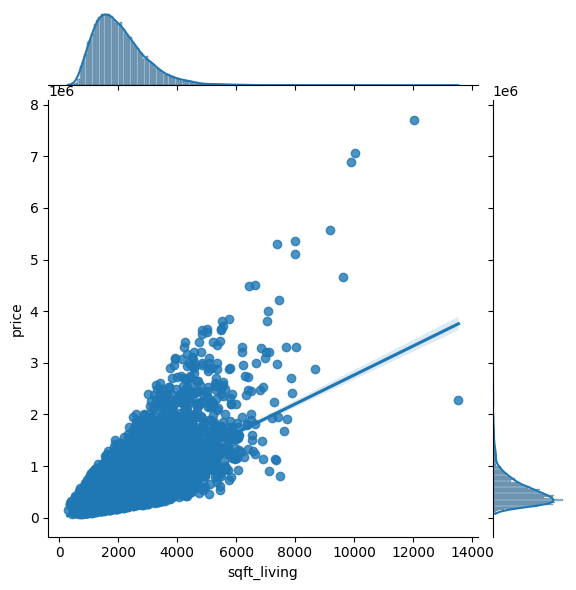

In [ ]:
sns.jointplot(x=df['sqft_living'], y=df['price'], kind='reg')


На графике мы можем наблюдать прямую линейную зависимость цены от жилой площади.  

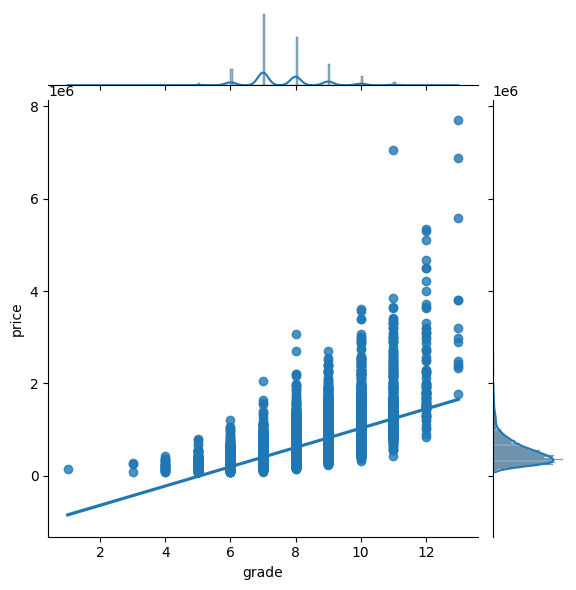

In [ ]:
sns.jointplot(x=df['grade'], y=df['price'], kind='reg')

График показал, что при повышении оценки (grade) увеличивается стоимость дома.

In [ ]:
grouped_grade = df.groupby('grade').median()['price'].reset_index()
grouped_grade

<ipython-input-26-57ba1f5a973c>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_grade = df.groupby('grade').median()['price'].reset_index()


,grade,price
0,1,142000.0
1,3,262000.0
2,4,205000.0
3,5,228700.0
4,6,275276.5
5,7,375000.0
6,8,510000.0
7,9,720000.0
8,10,914327.0
9,11,1284000.0


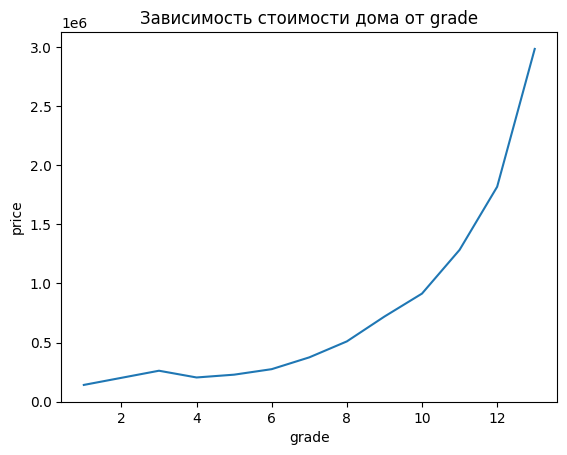

In [ ]:
даplt.plot(grouped_grade['grade'], grouped_grade['price'])

plt.title('Зависимость стоимости дома от grade')
plt.xlabel('grade')
plt.ylabel('price')

plt.show()

Text(0.5, 1.0, 'Distribution of price by grade')

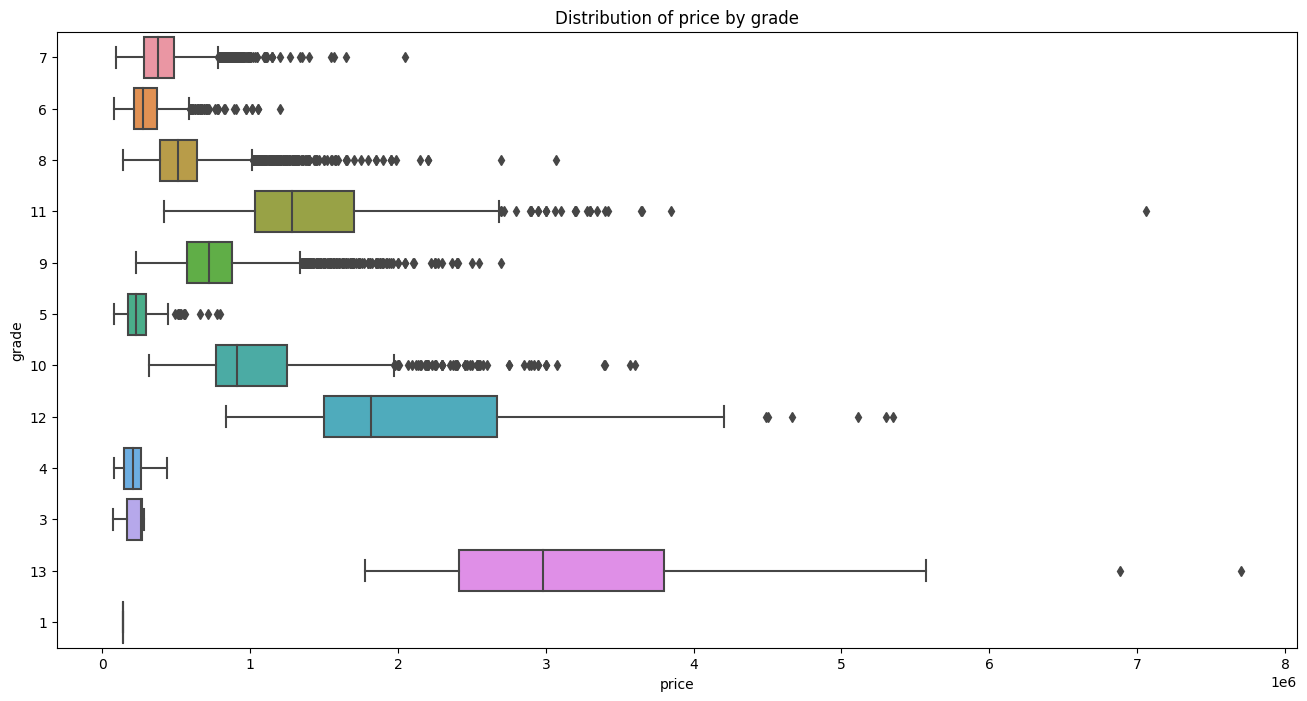

In [ ]:
plt.figure(figsize=(16, 8))

sns.boxplot(x=df['price'], y=df['grade'].astype('str'))

plt.title('Distribution of price by grade')

На представленном графике, в отличие от предыдущего, мы можем наблюдать, что  дома с разными оцеками могут входить в один ценовой диапазон.

Условно можно выделить несколько групп:
* до 500.000 - grade от 1 до 5,
* до 1.000.000 - grade от 6 до 8,
* до 2.000.000 - grade от 8 до 10,
* до 3.000.000 - grade 11,
* до 4.200.000 - grade 12,
* до 5.700.000 - grade 13.

Без учета выбросов, не входящих в границу усов.



Text(0.5, 1.0, 'Discription of price by waterfront')

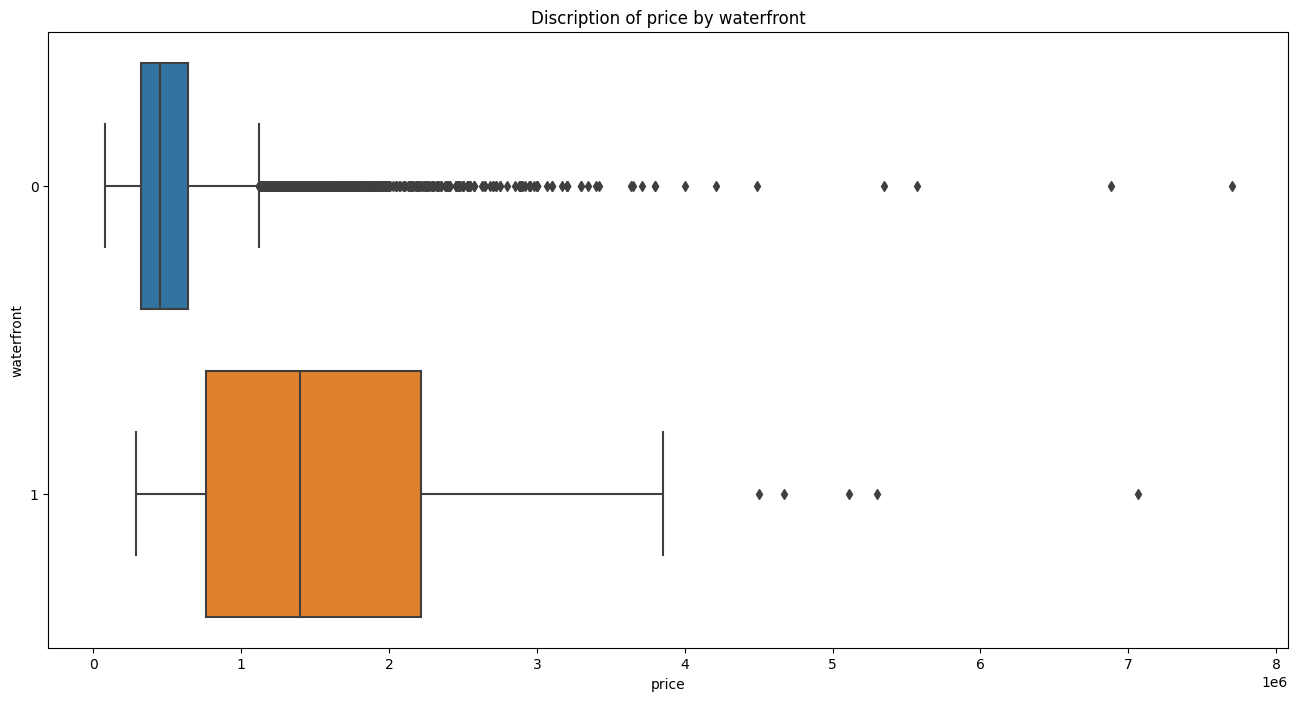

In [ ]:
plt.figure(figsize=(16, 8))

sns.boxplot(x=df['price'], y=df['waterfront'].astype('str'), whis=1.5)

plt.title('Discription of price by waterfront')

График показал, что несмотря на отсутвие сильной корреляции между price и waterfront (см. heatmap выше), наличие набережной повышает цену дома.